In [1]:
#-*-coding:utf-8-*-
'''
@author: TOoNe
'''
import numpy as np
import operator #operator module

2.1.1

In [2]:
def createDataSet():
    group=np.array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

In [9]:
group, labels = createDataSet()

In [7]:
group

array([[ 1. ,  1.1],
       [ 1. ,  1. ],
       [ 0. ,  0. ],
       [ 0. ,  0.1]])

In [10]:
lables

['A', 'A', 'B', 'B']

In [53]:
#@params: inX is the predicting sample
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = np.tile(inX, (dataSetSize,1)) - dataSet
    sqDiffMat = diffMat ** 2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances ** 0.5 #type:np.array
    sortedDistIndicies = distances.argsort()
    classCout = {}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCout[voteIlabel] = classCout.get(voteIlabel, 0) + 1 # dict.get(key, default=None)
    sortedClassCount = sorted(classCout.items(), key=operator.itemgetter(1), reverse=True)
    #print(sortedClassCount)
    return sortedClassCount[0][0]
classify0([0,0], group, labels, 3)

'B'

## 2.2示例：使用k-邻近算法改进约会网站的配对效果

In [20]:
def file2matrix(filename):
    fr = open(filename)
    arrayOfLines  = fr.readlines()
    numberOfLines = len(arrayOfLines)
    returnMat = np.zeros((numberOfLines, 3))
    classLabelVector = []
    index = 0
    for line in arrayOfLines:
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index, :] = listFromLine[0:3]
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    return returnMat, classLabelVector
datingDataMat, datingLabels = file2matrix('./data/dating/datingTestSet2.txt')

In [26]:
datingDataMat

array([[  4.09200000e+04,   8.32697600e+00,   9.53952000e-01],
       [  1.44880000e+04,   7.15346900e+00,   1.67390400e+00],
       [  2.60520000e+04,   1.44187100e+00,   8.05124000e-01],
       ..., 
       [  2.65750000e+04,   1.06501020e+01,   8.66627000e-01],
       [  4.81110000e+04,   9.13452800e+00,   7.28045000e-01],
       [  4.37570000e+04,   7.88260100e+00,   1.33244600e+00]])

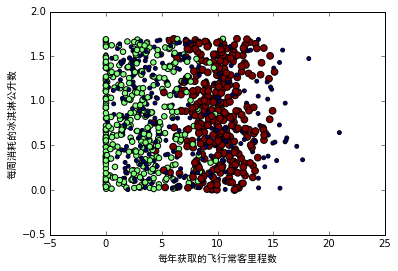

In [68]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:,1], datingDataMat[:,2], 15.0*np.array(datingLabels), 15.0*np.array(datingLabels))
plt.xlabel('每年获取的飞行常客里程数',fontproperties='SimHei')
plt.ylabel('每周消耗的冰淇淋公升数',fontproperties='SimHei')
plt.show()

In [37]:
datingDataMat.shape

(1000, 3)

In [35]:
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = minVals - maxVals
    normDataSet = np.zeros(np.shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - np.tile(minVals, (m,1))
    normDataSet = normDataSet / np.tile(ranges, (m,1))
    return normDataSet, ranges, minVals

In [36]:
normMat, ranges, minVals = autoNorm(datingDataMat)
normMat
ranges
minVals

array([[-0.44832535, -0.39805139, -0.56233353],
       [-0.15873259, -0.34195467, -0.98724416],
       [-0.28542943, -0.06892523, -0.47449629],
       ..., 
       [-0.29115949, -0.50910294, -0.51079493],
       [-0.52711097, -0.43665451, -0.4290048 ],
       [-0.47940793, -0.3768091 , -0.78571804]])

array([ -9.12730000e+04,  -2.09193490e+01,  -1.69436100e+00])

array([ 0.      ,  0.      ,  0.001156])

In [54]:
def datingClassTest():
    hoRatio = 0.10
    datingDataMat,datingLabels = file2matrix('./data/dating/datingTestSet2.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m*hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i, :], normMat[numTestVecs:m, :], datingLabels[numTestVecs:m], 3)
        print("the classifier came back with: %d, the real answer is: %d"%(classifierResult, datingLabels[i]))
        if (classifierResult != datingLabels[i]): errorCount += 1
    print("the total error rate is: %f"%(errorCount/float(numTestVecs)))

datingClassTest()

the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answe

In [57]:
def classifyPerson():
    resultList = ['Not at all', 'In small doses', 'In large doses']
    percetTals = float(input("percetage of time spent playing video games?"))
    ffMiles = float(input("frequent flier miles earned per year?"))
    iceCream = float(input("liters of ice cream consumed per year?"))
    datingDataMat,datingLabels = file2matrix('./data/dating/datingTestSet2.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    inArr = np.array([percetTals, ffMiles, iceCream])
    classifierResult = classify0((inArr - minVals)/ranges, normMat, datingLabels, 3)
    print("You will probably like this person: ", resultList[classifierResult - 1])
classifyPerson() 

percetage of time spent playing video games?10
frequent flier miles earned per year?10
liters of ice cream consumed per year?10
You will probably like this person:  In small doses


In [61]:
def img2vector(filename):
    returnVect = np.zeros((1, 1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0, 32*i+j] =int(lineStr[j])
    return returnVect
testVect = img2vector('./data/digits/trainingDigits/0_13.txt')
testVect

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [65]:
import os, sys
def handwritingClassTest():
    hwLabels = []
    trainingFileList = os.listdir('./data/digits/trainingDigits')
    m = len(trainingFileList)
    trainingMat = np.zeros((m, 1024))
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        trainingMat[i,:] = img2vector('./data/digits/trainingDigits/%s'%fileNameStr)
    testFileList = os.listdir('./data/digits/testDigits')
    mTest= len(testFileList)
    errorCount = 0.0
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector('./data/digits/testDigits/%s'%fileNameStr)
        classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, 3)
        #print("The classifier came back with: %d, the real answer is: %d"%(classifierResult, classNumStr))
        if(classifierResult != classNumStr): errorCount += 1 
    print("The total number of errors is : %d"%errorCount)
    print("The total error rate is: %f"%(errorCount/float(mTest)))
handwritingClassTest()


The total number of errors is : 11

The total error rate is: 0.011628
